In [ ]:
import os
import torch

from torch.utils.data import DataLoader

from data.dataset_class import MultiLabelDataset
from cnn.base_model import ResNetModel
from cnn.run_train import run_epochs, test_model
from cnn.utils import learning_curve


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ResNetModel().to(device)

In [ ]:
train_data = DataLoader(MultiLabelDataset("train", MultiLabelDataset.TRANSFORM_TRAIN), batch_size=64, shuffle=True, num_workers=4 or 8)
val_data = DataLoader(MultiLabelDataset("val", MultiLabelDataset.TRANSFORM_VAL), batch_size=64, shuffle=False, num_workers=4 or 8)
test_data = DataLoader(MultiLabelDataset("test", MultiLabelDataset.TRANSFORM_VAL), batch_size=64, shuffle=False, num_workers=4 or 8)

In [8]:
history = run_epochs(2, train_data, val_data, model)

Epoch: [1/2], train_loos: 0.1658, train_acc: 0.3778, val_loos: 0.1498,  val_acc: 0.3540


Epoch: [2/2], train_loos: 0.1592, train_acc: 0.4053, val_loos: 0.1421,  val_acc: 0.3885


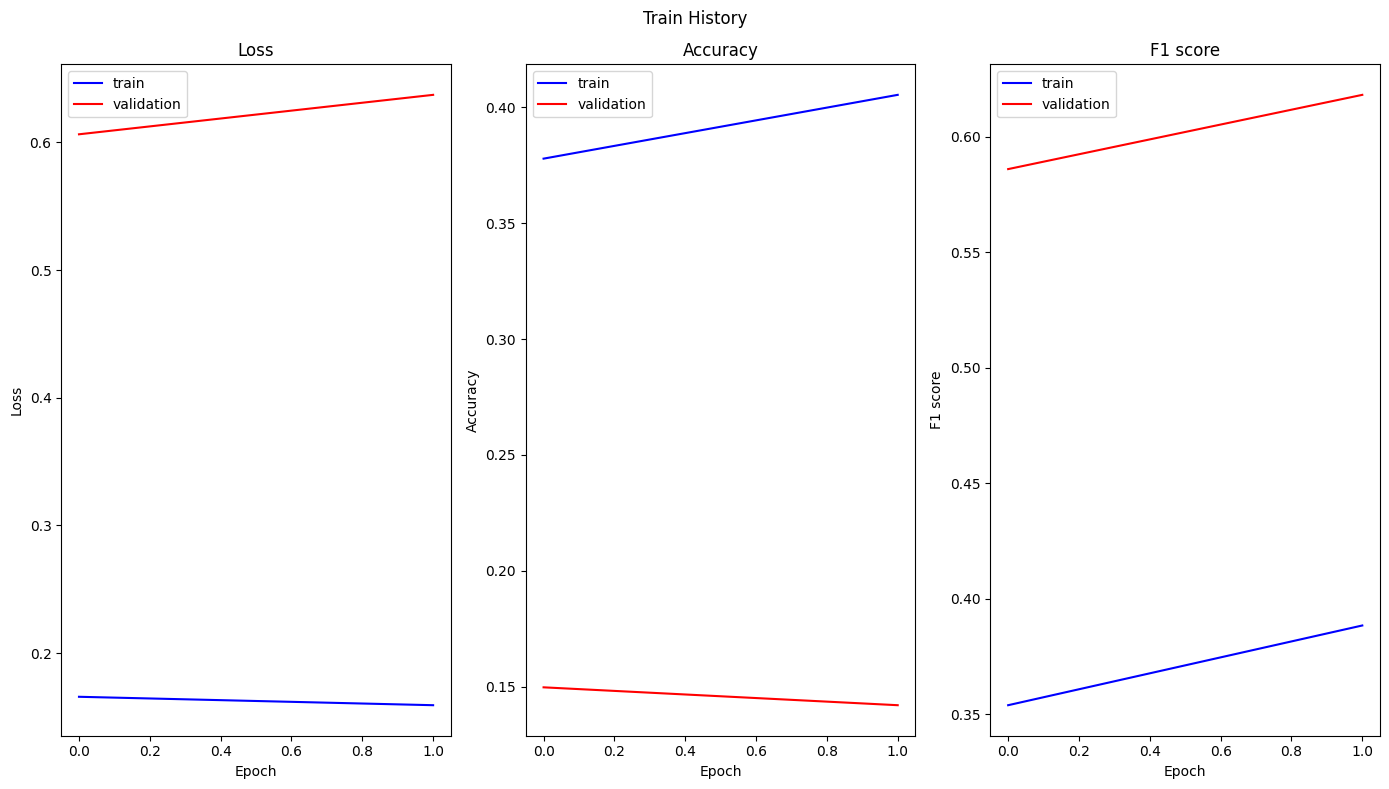

In [9]:
learning_curve(history)

In [13]:
print(test_model(test_data, model))

Loss: 0.15500685532887776
Accuracy: 0.3918580375782881
F1 score: 0.6231056765085992


In [ ]:
model.unfreeze_last_layer

In [ ]:
checkpoint = str(os.listdir("checkpoints")[-1])
epoch = int(checkpoint[checkpoint.find("_")+1:checkpoint.find("_")+2])

In [ ]:
optimizer_state, scheduler_state = ResNetModel.get_optimizer_and_scheduler_from_checkpoint(epoch)

AttributeError: type object 'ResNetModel' has no attribute 'get_optimizer_and_sheduler_from_checkpoint'

In [ ]:
history_ft = run_epochs(2, train_data, val_data, model, optimizer_state=optimizer_state, scheduler_state=scheduler_state, ft=True)

In [ ]:
learning_curve(history_ft)

In [ ]:
example_data = MultiLabelDataset("test")

img, target = example_data[123]
pred = model.predict_proba(img.unsqueeze(0))

print("Target: ", target)
print("Predict", [round(float(x), 2) for x in pred.numpy()[0]])

<class 'torchvision.tv_tensors._image.Image'>
Target:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])
Predict [0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 1.0, 0.02, 0.0, 0.02, 0.36, 0.0, 0.0, 0.0]


In [22]:
print(model.predict(img.unsqueeze(0)))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])


In [7]:

print(test_model(test_data, model))

Loss: 1.1013838120301565
Accuracy: 0.9111038622129436


In [6]:
model = ResNetModel.load_checkpoint(0)



Metrics this checkpoint: {'train_loos': 0.7193420712602433, 'train_acc': 0.9324925406122223, 'val_loos': 1.0422675653050344, 'val_acc': 0.9047988881621976}


In [ ]:
print(test_model(test_data, model))